In [2]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import time
import os
from IPython.display import display_html
#from textblob import TextBlob
from textblob import TextBlob
import sys
from collections import Counter

In [3]:
## Defining the connection credentials:

api_key = 'F1aKIv54mAIMon4lSfo9pWmlT'
api_secret_key = 'KLDtNSq5rDEMSfPWJVKYzbgte26raIhb86mR7Z3yyOhbkdDIdJ'
access_token = '1484196974798643206-cC08BZ3eTHuoCqUR4rdC9yKbslkXFr' 
access_token_secret = 'emzp02IodFWOiP7txIBko0TnXHosGkP23YiuRmB3LTMU1'

##Making sure all credentials are active, so tweet scan be extracted
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Twitter Sentiment Analysis

In [4]:
def extract_tweets(hashtag):
    user = []
    string = []
    timestamp = []
    
    for tweet in tweepy.Cursor(api.search_tweets,q=hashtag, count=100).items(100):
        if (not tweet.retweeted) and ("RT @" not in tweet.text):
            #get english language tweets
            if tweet.lang == "en":
                #get username, time tweeted and the tweet in text
                user.append(tweet.user.name)
                string.append(tweet.text)
                timestamp.append(tweet.created_at)

                    
    df = pd.DataFrame({"USERNAME":user, "TWEETS": string, "TIME": timestamp,})
    return df

In [5]:
depression_df = extract_tweets("depressed")

In [6]:
depression_df["SENTIMENT VALUE"] = depression_df["TWEETS"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
print(depression_df.head())

      USERNAME                                             TWEETS  \
0   bojack bot  I gotta say I am having the time of my life be...   
1       aenn 🎀  i may be depressed, gay and uglee but atleast ...   
2        Dolly  “R u ok”\n“No I’m depressed”\n“Ya u kinda look...   
3  Not Barrett  My high schoolers are right! This IS a mood, (...   
4       nyebol  @Ik08975924 @_jaylahnicole Not everyone can ge...   

                       TIME  SENTIMENT VALUE  
0 2022-05-05 20:39:43+00:00         0.000000  
1 2022-05-05 20:39:43+00:00         0.416667  
2 2022-05-05 20:39:42+00:00         0.150000  
3 2022-05-05 20:39:39+00:00         0.258571  
4 2022-05-05 20:39:35+00:00         0.100000  


In [7]:
depression_df_positive = depression_df[depression_df["SENTIMENT VALUE"] > 0.0]
depression_df_negative = depression_df[depression_df["SENTIMENT VALUE"] < 0.0]
print("Positive Sentiment Tweets:", len(depression_df_positive))
print("Negative Sentiment Tweets:", len(depression_df_negative))

Positive Sentiment Tweets: 18
Negative Sentiment Tweets: 9


In [8]:
def sentiment_analysis(hashtag):
    depression_df = extract_tweets(hashtag)
    depression_df["SENTIMENT"] = depression_df["TWEET"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    #calculate sentiment value
    positive_df = depression_df[depression_df["SENTIMENT"] > 0.0]
    negative_df = depression_df[depression_df["SENTIMENT"] < 0.0]
    print("Positive Tweets on #{}: ".format(hashtag), len(df_pos))
    print("Negative Tweets on #{}: ".format(hashtag), len(df_neg))
    return (len(positive_df), len(negative_df))

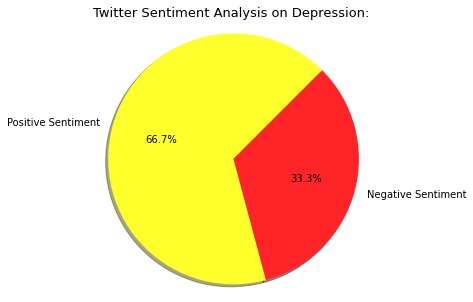

In [9]:
%matplotlib inline
#pie chart to show sentiment data visually 
import matplotlib.pyplot as plt


def sentiment_data(positive,negative,hashtag):
    fig1, ax1 = plt.subplots(figsize=(5,5))
    labels = ["Positive Sentiment", "Negative Sentiment"]
    sizes = [positive,negative]
    yellow = (50/50,100/100,44/255)
    red = (100/100,10/70,40/255)
    
    #creating pie chart features
    colors=[yellow, red]
    ax1.pie(sizes,  labels=labels, autopct="%1.1f%%", colors=colors, startangle=45, shadow=True)
    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title("Twitter Sentiment Analysis on {}: ".format(hashtag), fontsize=13)
plt.show()
sentiment_data(len(depression_df_positive), len(depression_df_negative), "Depression")

In [10]:
depression_df.shape

(41, 4)

In [11]:
depression_df.isnull().any()

USERNAME           False
TWEETS             False
TIME               False
SENTIMENT VALUE    False
dtype: bool

In [12]:
depression_df['words'] = depression_df['TWEETS'].apply(lambda x:str(x.lower()).split())
top = Counter([item for sublist in depression_df['words'] for item in sublist])
temp = pd.DataFrame(top.most_common(40))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

# Twitter Data Analysis

In [13]:
originalTweet = []

#Creating the dataframes and its coloumns 
DBSATweets = pd.DataFrame(data = ([]), columns = ['DBSA Tweets', 'Tweet ID', 'Date', 'Tweet', 'Source of Tweet', 'Likes', 'Retweets'])

#Creating algorithm to allow dataframes to be vsually seen
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

        
#Holds first 200 tweets of the account: DBSAlliance
DBSAtweets1 = api.user_timeline(screen_name="DBSAlliance", count=200)
#Creating a for loop to check if the tweet has a "RT @" at the start
for x in DBSAtweets1:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)
        


#Place tweets into a tweet.text and this will provide us data for likes, retweets etc
index = 0
lastTweetID = 0
count =0

for tweet in DBSAtweets1:
    DBSATweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    count +=1
    index += 1
    if(index == 199):
        lastTweetID = tweet.id

#Makes sure theres no tweet repetition
lastTweetID -= 1

#Takes 100 different tweets more from DBSAlliance account
DBSAtweets2 = api.user_timeline(max_id = lastTweetID, screen_name="DBSAlliance", count=100)

#for loop which checks if tweet has "RT @ at the start"
for x in DBSAtweets2:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)
        
for tweet in DBSAtweets2:
    DBSATweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    count +=1
    index += 1
    

In [14]:
display(DBSATweets.head(300))

DBSA Tweets  \
0         Having a robust social support network can help with overall wellness when living with a mental health condition. L… https://t.co/6zGQbNfmII   
1          Tardive dyskinesia (TD) can have a big impact on individuals’ lives. Those with diagnosed or suspected TD reported… https://t.co/1Tl6MOYlTY   
2         Listen or read about how Sierra found that healing is there for her when she was ready and how DBSA was able to mee… https://t.co/5wcnalnqge   
3                                                                                                                                   @HeartlifeHolis2 💙   
4         #MothersDay is right around the corner and we have just what you need to show her how much you appreciate her, or a… https://t.co/6JOpvYLpzQ   
5         If you’re considering therapy, choosing the therapist that’s right for you is the first big step. Read our guide on… https://t.co/wpJmsFtzCW   
6          This #TDAwarenessWeek, we’re spreading the word about tardive dyskinesia, a condition of uncontrollable movements.… https://t.co/JwsX9MvFtv   
7         DBSA is proud to support the 5th Annual #TDAwarenessWeek. Tardive dyskinesia is a condition of uncontrollable movem… https://t.co/UCEcM8bC73   
8                                                                                                             Learn more here: https://t.co/6WE5O3Nb5H   
9         May is #MentalHealthAwarenessMonth. No matter what step of the wellness journey you’re on, DBSA is here with the to… https://t.co/IhGCMZdiPt   
10         Why, hello there! You’ve caught me right after a guided meditation and that feels so good. My name is Calm, and as… https://t.co/Gka7QUPKDo   
11          Your voice matters. Older adults living with depression: take our survey to tell researchers what matters to you:… https://t.co/XTtf99pIeM   
12         Missed our live program with @PlatformQHealth on #majordepressivedisorder (MDD)? Tune in now on-demand for AMA PRA… https://t.co/kYpqdjIpDt   
13        It may not feel like it at first, but #youmatter, and #youareloved. It is hard to fight those negative feelings. Sh… https://t.co/I0gGbwW89x   
14        Caring for pregnant women or new mothers? Our #CME program on #postpartum #depression (PPD) produced in partnership… https://t.co/3zij131bzS   
15        During #NationalVolunteerWeek, and every week of the year, we are incredibly grateful to the volunteers who make DB… https://t.co/bI4Ncyyi7t   
16        April is #StressAwarenessMonth. Stress affects about 55% of Americans daily. For more information on the physical a… https://t.co/GcvLCnp8Li   
17         Your spiritual wellness is the way you connect with the values, purpose, and meaning you establish for yourself in… https://t.co/Yq9ZsEDY8j   
18        Children are experiencing #mentalhealth symptoms at an all-time high, especially low-income students who experience… https://t.co/pjOEjGypNB   
19          Your voice matters. Older adults living with depression: take our survey to tell researchers what matters to you:  https://t.co/XZRWEy8Ea3   
20                Living in #wellness can seem like light-years away when you aren’t given the proper tools for managing your… https://t.co/fIimivMoLZ   
21        Join Rural Minds and DBSA today at 8:00 pm ET for the Rural Mental Health Connections Webinar. DBSA CEO Micahel Pol… https://t.co/WAteGWRkEO   
22        Depression affects many people. Although there are many warning signs of depression, it may be harder to spot dysth… https://t.co/viP1ixRjw8   
23        Tax Day is quickly approaching. Are you where you’d like to be in terms of financial wellness? Learn how finances i… https://t.co/XmpK4UCWof   
24        We want your opinions to help inform the future of depression research. If you’re an older adult living with depres… https://t.co/mQn7bacKmq   
25        RT @PlatformQHealth: Looking forward to today’s program on PPD risk factors and early intervention for pregnant women and new

In [15]:
originalTweet = []

NHSTweets = pd.DataFrame(data = ([]), columns = ['NHS Tweets', 'Tweet ID', 'Date', 'Tweet', 'Source of Tweet', 'Likes', 'Retweets'])

pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)


NHStweets1 = api.user_timeline(screen_name="NHSuk", count=200)

for x in NHStweets1:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)  
index = 0
lastTweetID = 0
count =0

for tweet in NHStweets1:
    NHSTweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    if(index == 199):
        lastTweetID = tweet.id
    count +=1
    index += 1
    

lastTweetID -= 1
NHStweets2 = api.user_timeline(max_id = lastTweetID, screen_name="NHSuk", count=100)

for x in NHStweets2:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)
        

for tweet in NHStweets2:
    NHSTweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    count +=1    
    index += 1

In [16]:
originalTweet = []


MindTweets = pd.DataFrame(data = ([]), columns = ['Mind Tweets', 'Tweet ID', 'Date', 'Tweet', 'Source of Tweet', 'Likes', 'Retweets'])


pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)


Mindtweets1 = api.user_timeline(screen_name="MindCharity", count=200)

for x in Mindtweets1:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)  
        
index = 0
lastTweetID = 0
count = 0

for tweet in Mindtweets1:
    MindTweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    if(index == 199):
        lastTweetID = tweet.id
    count +=1    
    index += 1
    
lastTweetID -= 1

Mindtweets2 = api.user_timeline(max_id = lastTweetID, screen_name="MindCharity", count=100)

for x in Mindtweets2:
    if x.text.startswith("RT @") == True:
        originalTweet.append(False)
    else:
        originalTweet.append(True)  
        
for tweet in Mindtweets2:
    MindTweets.loc[index] = [tweet.text, tweet.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, originalTweet[count]]
    count +=1    
    index += 1


In [17]:
#Creates a dataframe and puts all account tweets in one to compare
Tweets = pd.DataFrame({'DBSA': [tweet.text for tweet in DBSAtweets1 + DBSAtweets2],
                   'NHS': [tweet.text for tweet in NHStweets1 + NHStweets2],
                   'Mind': [tweet.text for tweet in Mindtweets1 + Mindtweets2]})

#creating table
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
#Shows the tweets on display
Tweets

DBSA  \
0         Having a robust social support network can help with overall wellness when living with a mental health condition. L… https://t.co/6zGQbNfmII   
1          Tardive dyskinesia (TD) can have a big impact on individuals’ lives. Those with diagnosed or suspected TD reported… https://t.co/1Tl6MOYlTY   
2         Listen or read about how Sierra found that healing is there for her when she was ready and how DBSA was able to mee… https://t.co/5wcnalnqge   
3                                                                                                                                   @HeartlifeHolis2 💙   
4         #MothersDay is right around the corner and we have just what you need to show her how much you appreciate her, or a… https://t.co/6JOpvYLpzQ   
5         If you’re considering therapy, choosing the therapist that’s right for you is the first big step. Read our guide on… https://t.co/wpJmsFtzCW   
6          This #TDAwarenessWeek, we’re spreading the word about tardive dyskinesia, a condition of uncontrollable movements.… https://t.co/JwsX9MvFtv   
7         DBSA is proud to support the 5th Annual #TDAwarenessWeek. Tardive dyskinesia is a condition of uncontrollable movem… https://t.co/UCEcM8bC73   
8                                                                                                             Learn more here: https://t.co/6WE5O3Nb5H   
9         May is #MentalHealthAwarenessMonth. No matter what step of the wellness journey you’re on, DBSA is here with the to… https://t.co/IhGCMZdiPt   
10         Why, hello there! You’ve caught me right after a guided meditation and that feels so good. My name is Calm, and as… https://t.co/Gka7QUPKDo   
11          Your voice matters. Older adults living with depression: take our survey to tell researchers what matters to you:… https://t.co/XTtf99pIeM   
12         Missed our live program with @PlatformQHealth on #majordepressivedisorder (MDD)? Tune in now on-demand for AMA PRA… https://t.co/kYpqdjIpDt   
13        It may not feel like it at first, but #youmatter, and #youareloved. It is hard to fight those negative feelings. Sh… https://t.co/I0gGbwW89x   
14        Caring for pregnant women or new mothers? Our #CME program on #postpartum #depression (PPD) produced in partnership… https://t.co/3zij131bzS   
15        During #NationalVolunteerWeek, and every week of the year, we are incredibly grateful to the volunteers who make DB… https://t.co/bI4Ncyyi7t   
16        April is #StressAwarenessMonth. Stress affects about 55% of Americans daily. For more information on the physical a… https://t.co/GcvLCnp8Li   
17         Your spiritual wellness is the way you connect with the values, purpose, and meaning you establish for yourself in… https://t.co/Yq9ZsEDY8j   
18        Children are experiencing #mentalhealth symptoms at an all-time high, especially low-income students who experience… https://t.co/pjOEjGypNB   
19          Your voice matters. Older adults living with depression: take our survey to tell researchers what matters to you:  https://t.co/XZRWEy8Ea3   
20                Living in #wellness can seem like light-years away when you aren’t given the proper tools for managing your… https://t.co/fIimivMoLZ   
21        Join Rural Minds and DBSA today at 8:00 pm ET for the Rural Mental Health Connections Webinar. DBSA CEO Micahel Pol… https://t.co/WAteGWRkEO   
22        Depression affects many people. Although there are many warning signs of depression, it may be harder to spot dysth… https://t.co/viP1ixRjw8   
23        Tax Day is quickly approaching. Are you where you’d like to be in terms of financial wellness? Learn how finances i… https://t.co/XmpK4UCWof   
24        We want your opinions to help inform the future of depression research. If you’re an older adult living with depres… https://t.co/mQn7bacKmq   
25        RT @PlatformQHealth: Looking forward to today’s program on PPD risk factors and early intervention for pregnant women and new mother

In [18]:
NHSTweets['Tweet'].value_counts()

Twitter Web App             154
Sprout Social               133
Twitter for Advertisers       7
Twitter for iPhone            3
Twitter for Advertisers.      3
Name: Tweet, dtype: int64

In [19]:
DBSA = api.get_user(screen_name = 'DBSAlliance')
NHS = api.get_user(screen_name = 'NHSuk')
Mind = api.get_user(screen_name = 'MindCharity')


datacompare = {
  "Follower Count": [DBSA.followers_count, NHS.followers_count, Mind.followers_count],
  "Amount of Tweets": [DBSA.statuses_count, NHS.statuses_count, Mind.statuses_count], 
  "Highest Likes": [np.max(DBSATweets['Likes']), np.max(NHSTweets['Likes']), np.max(MindTweets['Likes'])],
}

<AxesSubplot:>

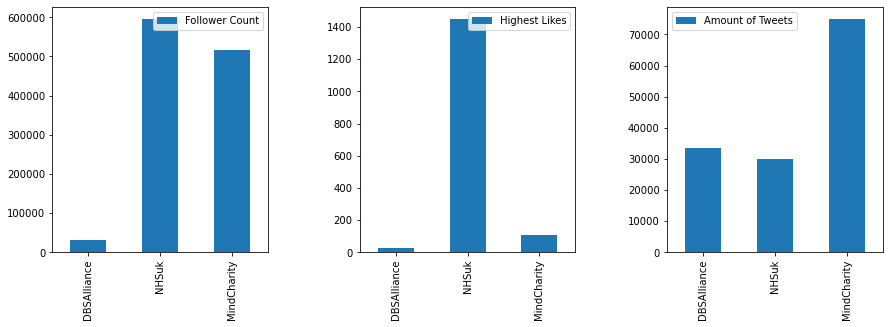

In [20]:
#allows the graphs to be side by side
df = pd.DataFrame(datacompare, index = [DBSA.screen_name, NHS.screen_name, Mind.screen_name])

figure, axes = plt.subplots(nrows = 1, ncols = 3)
figure.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=2, hspace=None, top=None, wspace=None,)

#creates the graph, with the kind of graph using the df
df.plot(kind='bar', y = ['Follower Count'], ax=axes[0])
df.plot(kind='bar', y = ['Highest Likes'], ax=axes[1])
df.plot(kind='bar', y = ['Amount of Tweets'], ax=axes[2])

In [21]:
#id's of the accounts that are being followed are stored here:

followers1 = [] 
followers2 = [] 
followers3 = [] 
proxmicity = []

#retrieve the ids of 10 friends for each account:

for friend in tweepy.Cursor (api.get_friends, user_id = DBSA.id).items(10):
    followers1.append(f"{DBSA.id} {friend.id}")
    
for friend in tweepy.Cursor (api.get_friends, user_id = NHS.id).items(10):
    followers2.append(f"{NHS.id} {friend.id}")
    
for friend in tweepy.Cursor (api.get_friends, user_id = Mind.id).items(10):
     followers3.append(f"{Mind.id} {friend.id}")

#combine all the lists into an edge list:
        
proxmicity = followers1 + followers2 + followers3    

In [22]:
prox = (list(map(int,l.split())) for l in proxmicity)
zebra = nx.from_edgelist(prox)
g = zebra

In [23]:
proxmicity

['94458238 18916728',
 '94458238 1079061579973439488',
 '94458238 1305633717356957696',
 '94458238 20579312',
 '94458238 2842298465',
 '94458238 49766562',
 '94458238 2456547120',
 '94458238 76739691',
 '94458238 58815706',
 '94458238 872270165186052097',
 '10215212 300526090',
 '10215212 3662082496',
 '10215212 393497570',
 '10215212 21649103',
 '10215212 366497984',
 '10215212 401136344',
 '10215212 1120633726478823425',
 '10215212 3843940318',
 '10215212 359884792',
 '10215212 1190736699741134848',
 '27033505 29004509',
 '27033505 61521791',
 '27033505 370075631',
 '27033505 537517683',
 '27033505 1524248407',
 '27033505 437723929',
 '27033505 22028340',
 '27033505 20052899',
 '27033505 1168968080690749441',
 '27033505 1014534632841367552']

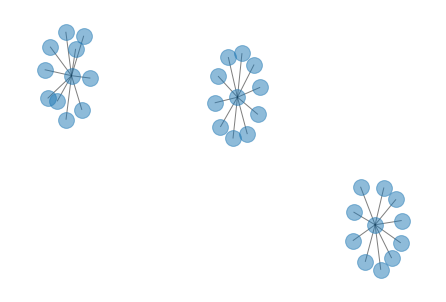

In [24]:
layout = nx.spring_layout(g)
nx.draw(g,pos=layout,node_size=250,alpha=0.5) # draws the graphs